## Imports

In [1]:
# -*- coding: utf-8 -*-
import dataiku, os, io
import pandas as pd, numpy as np
from dataiku import pandasutils as pdu
import geopandas as gpd
import imageio
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image, display
%matplotlib inline

/opt/dataiku/data/code-envs/python/aitfpy/lib/python3.6/site-packages/attr/__init__.py:32: DeprecationWarning: Running attrs on Python 3.6 is deprecated & we intend to drop support soon. If that's a problem for you, please let us know why & we MAY re-evaluate: <https://github.com/python-attrs/attrs/pull/993>
  DeprecationWarning,


## Get input data

In [2]:
# Read recipe inputs
df = dataiku.Dataset("train_images_files_stacked_prepared_joined").get_dataframe()
train_images_3 = dataiku.Folder("rPzAWZMv")
train_images_1 = dataiku.Folder("vYN91FXq")
train_images_2 = dataiku.Folder("xPzUYidC")
output_folder = dataiku.Folder("nBdc2O8G")

In [3]:
root_dir = '/opt/dataiku/data/managed_folders/WGG_COHORT2_METHANE_PROJ/'

In [4]:
df.head(2)

path                                path_2              path_3        basename extension   Latitude  Longitude      Type  Source                                       Image_Folder                 Image_Folder_lat_long                                           geometry
0  /train_images_2/train_images_2/29.600373374211...  29.600373374211298_-92.7643751898648  sentinel-2-60m.npy  sentinel-2-60m       npy  29.600373 -92.764375  Negative  Bridge  train_images/29.600373374211298_-92.7643751898...  29.600373374211298_-92.7643751898648  POLYGON ((-92.76114125484196 29.60319954090100...
1  /train_images_2/train_images_2/29.600373374211...  29.600373374211298_-92.7643751898648      sentinel-1.npy      sentinel-1       npy  29.600373 -92.764375  Negative  Bridge  train_images/29.600373374211298_-92.7643751898...  29.600373374211298_-92.7643751898648  POLYGON ((-92.76114125484196 29.60319954090100...

## Filter data by category

In [10]:
df_png = df.copy()
df_png = df_png[(df_png.extension == "png")]
df_png['path_train'] = df_png.path.map(lambda x: x.replace("/train_images_all/train_images_1/", f"vYN91FXq/train_images_1/train_images_1/").replace("/train_images_2/train_images_2/",
                                         f"xPzUYidC/train_images_2/train_images_2/").replace("/train_images_3/train_images_3/", f"rPzAWZMv/train_images_3/train_images_3/"))
df_png.reset_index(inplace=True, drop=True)

# shuffle dataframe in place
df_png = df_png.sample(frac=1).reset_index(drop=True)
categories = list(df_png.Type.unique())[:7]

In [11]:
# select subset of balanced data to analyze
n_train = 1000
df_subset = df_png[(df_png.Type == 'Negative') & (df_png.Type != 'Ripples') & (df_png.Type != 'Ocean')].iloc[:n_train].copy()
for cat in categories:
    if cat == 'Negative': continue
    new_df = df_png[df_png.Type == cat].iloc[:n_train].copy()
    df_subset = df_subset.append(new_df)

In [12]:
df_subset['path_train'] = df_subset.path.map(lambda x: x.replace("/train_images_all/train_images_1/", f"vYN91FXq/train_images_1/train_images_1/").replace("/train_images_2/train_images_2/",
                                         f"xPzUYidC/train_images_2/train_images_2/").replace("/train_images_3/train_images_3/", f"rPzAWZMv/train_images_3/train_images_3/"))

In [13]:
categories

['Negative',
 'CAFOs',
 'RefineriesAndTerminals',
 'WWTreatment',
 'ProcessingPlants',
 'Landfills',
 'Mines']

In [14]:
categories = list(df_subset.Type.unique())
cat_info = {
    'Negative':'Negatives',
    'WWTreatment':'Wastewater Treatment Plants',
    'CAFOs':'Concentrated Animal Feeding Operations',
    'RefineriesAndTerminals':'Refineries and Terminals',
    'Mines':'Coal Mines',
    'Landfills':'Landfills',
    'ProcessingPlants':'Natural Gas Processing Plants'
}
assert set(list(cat_info.keys())) == set(categories)

## Analyze images

#### Comments:
All images have the same size: 720 x 720 x 3 channels (RGB), with a 1 m resolution.<br>
There are 7 unique labels:<br>
* 'Negatives',<br>
* 'Wastewater Treatment Plants',<br>
* 'Concentrated Animal Feeding Operations',<br>
* 'Refineries and Terminals',<br>
* 'Coal Mines',<br>
* 'Landfills',<br>
* 'Natural Gas Processing Plants'<br>



In [16]:
def analyze_images(df_subset, cat, cat_name):
    # Analyze random negative images
    df_img = df_subset[df_subset.Type == cat].sample(n=6)

    imgs = []
    for path in df_img.path_train:
        path = os.path.join(root_dir, path)
        imgs.append(imageio.v3.imread(path))
    
    fig, axs = plt.subplots(2, 3, sharey=True, figsize=(16,10))
    axs[0,0].imshow(imgs[0][:,:,:3])
    axs[0,1].imshow(imgs[1][:,:,:3])
    axs[0,2].imshow(imgs[2][:,:,:3])
    axs[1,0].imshow(imgs[3][:,:,:3])
    axs[1,1].imshow(imgs[4][:,:,:3])
    axs[1,2].imshow(imgs[5][:,:,:3])
    fig.suptitle(f'{cat_name} Images', fontsize=16)
    
    return df_img, fig

In [17]:
data = {}
figures = {}

### Negative Images

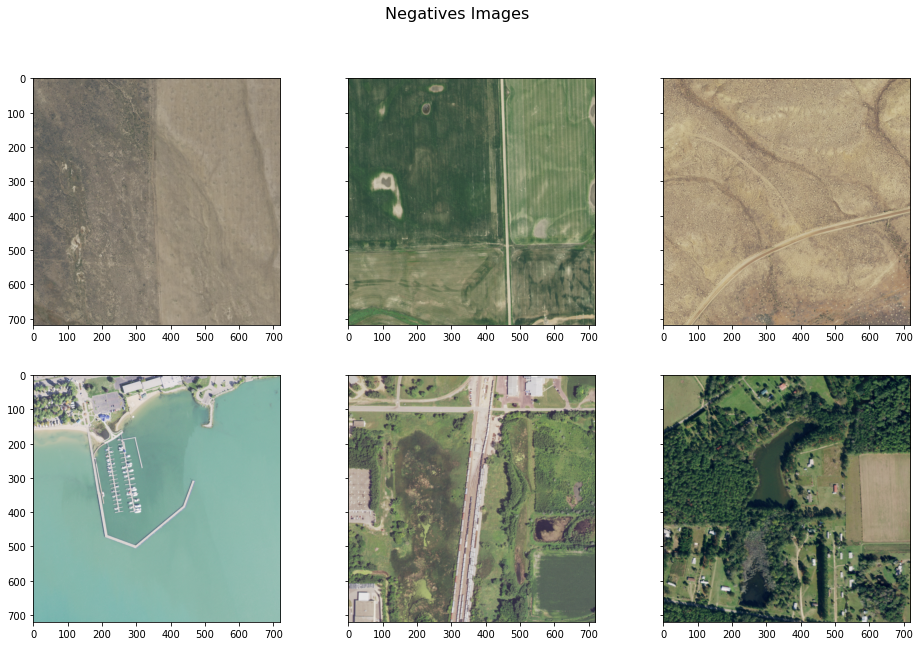

In [18]:
data[categories[0]], figures[categories[0]] = analyze_images(df_subset, categories[0], cat_info[categories[0]])

### Waste Water Treatment Plant Images

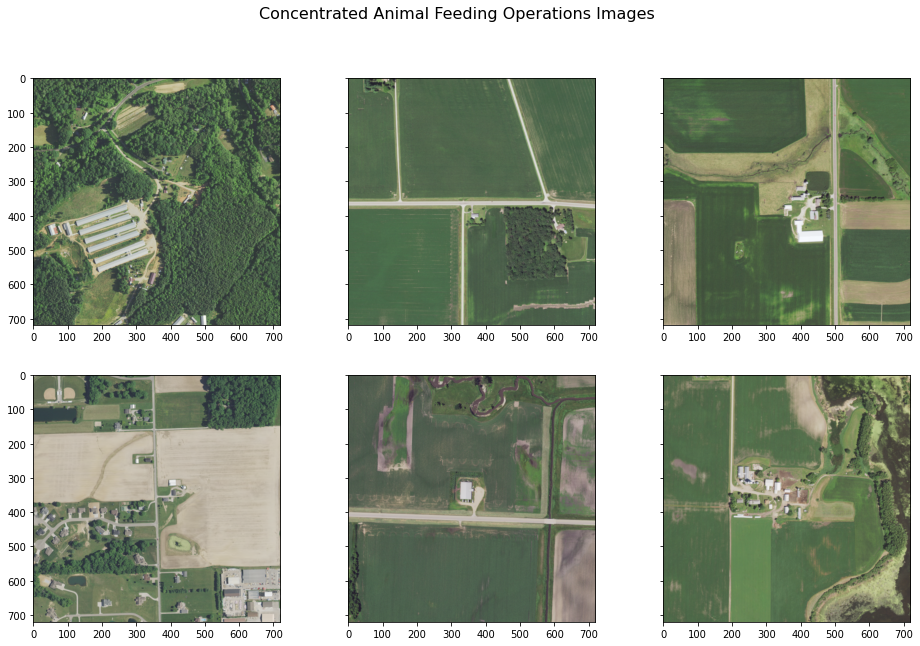

In [19]:
data[categories[1]], figures[categories[1]] = analyze_images(df_subset, categories[1], cat_info[categories[1]])

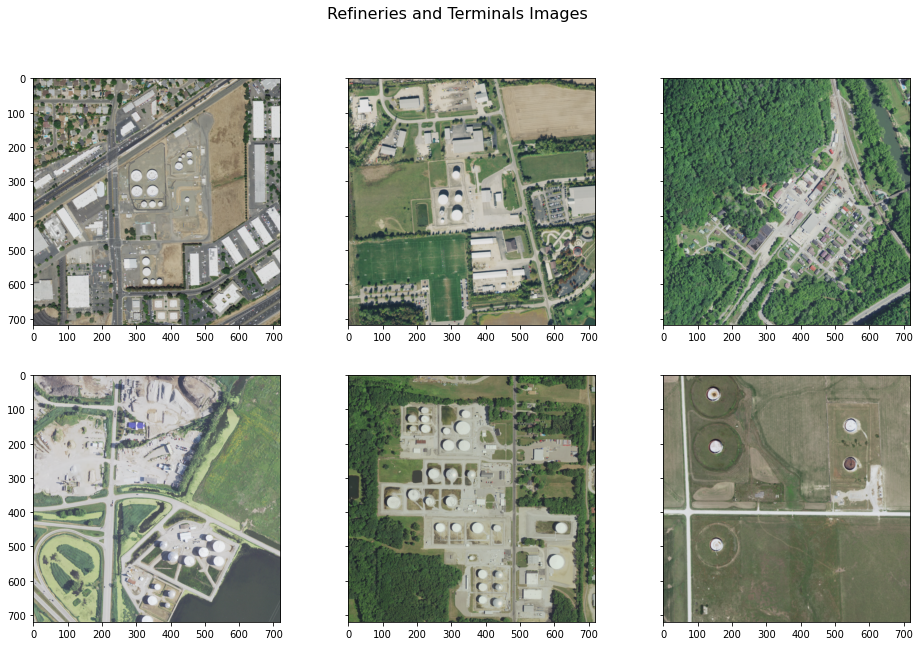

In [20]:
data[categories[2]], figures[categories[2]] = analyze_images(df_subset, categories[2], cat_info[categories[2]])

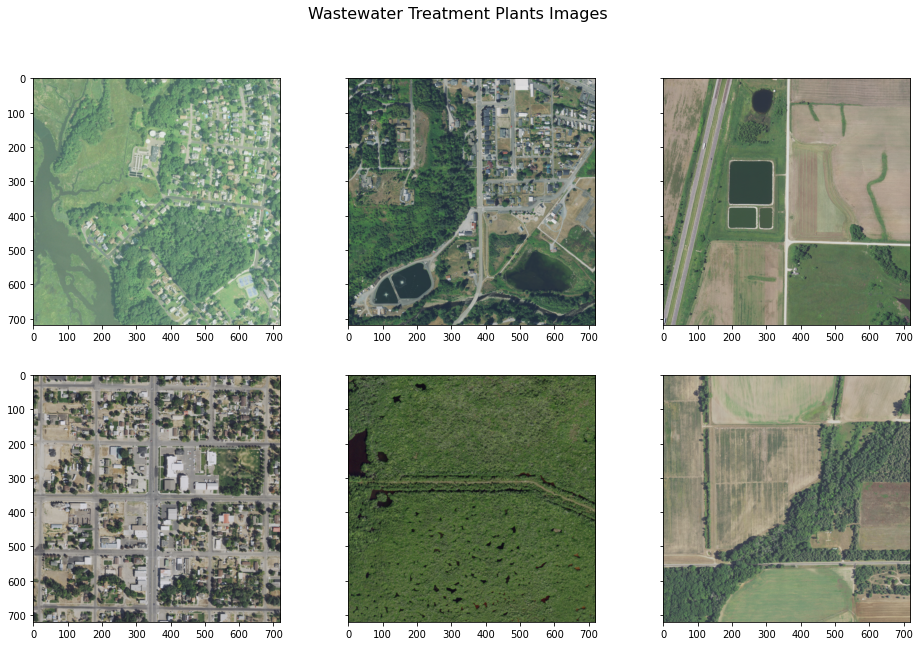

In [21]:
data[categories[3]], figures[categories[3]] = analyze_images(df_subset, categories[3], cat_info[categories[3]])

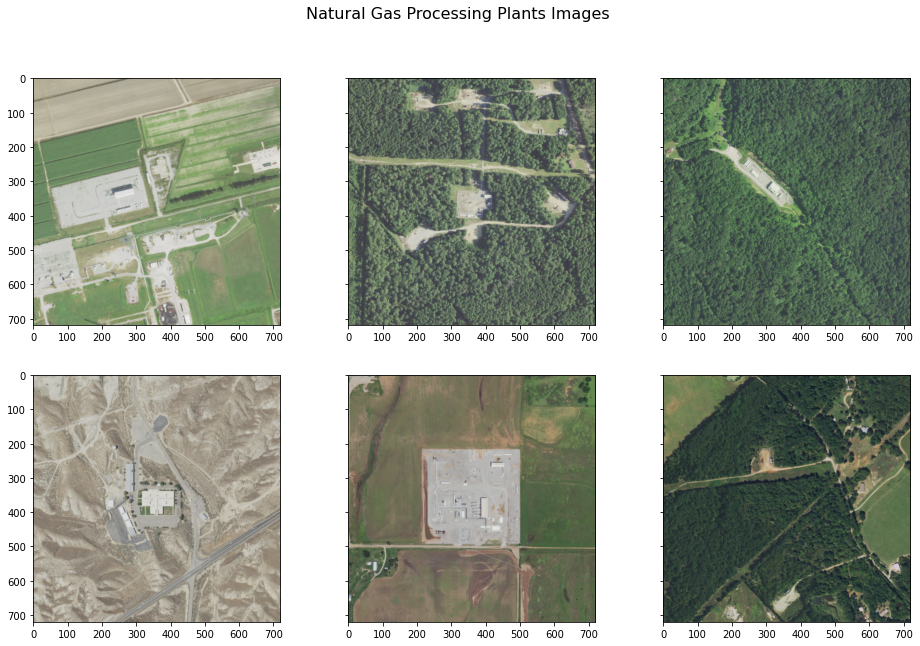

In [22]:
data[categories[4]], figures[categories[4]] = analyze_images(df_subset, categories[4], cat_info[categories[4]])

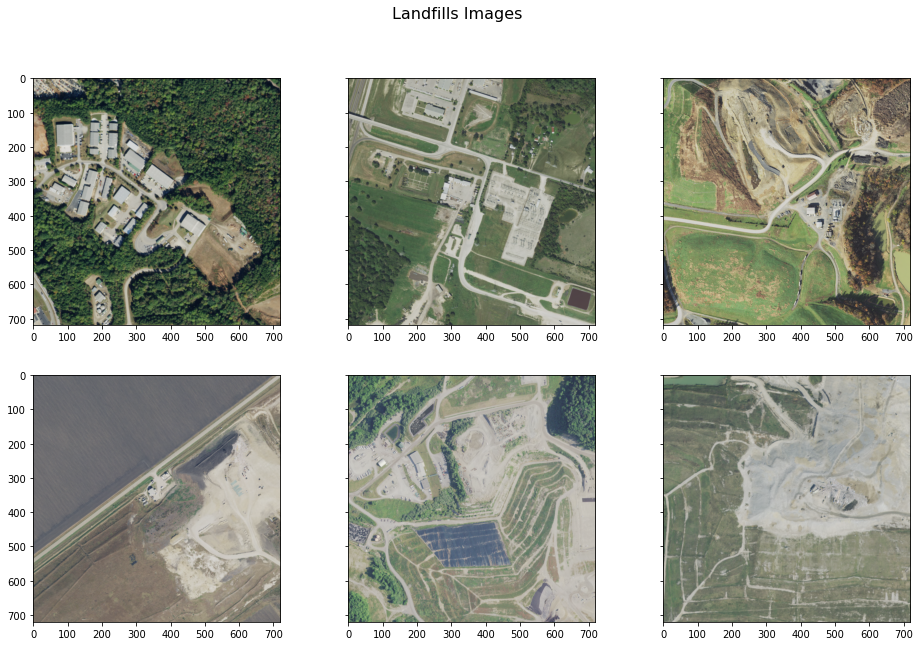

In [23]:
data[categories[5]], figures[categories[5]] = analyze_images(df_subset, categories[5], cat_info[categories[5]])

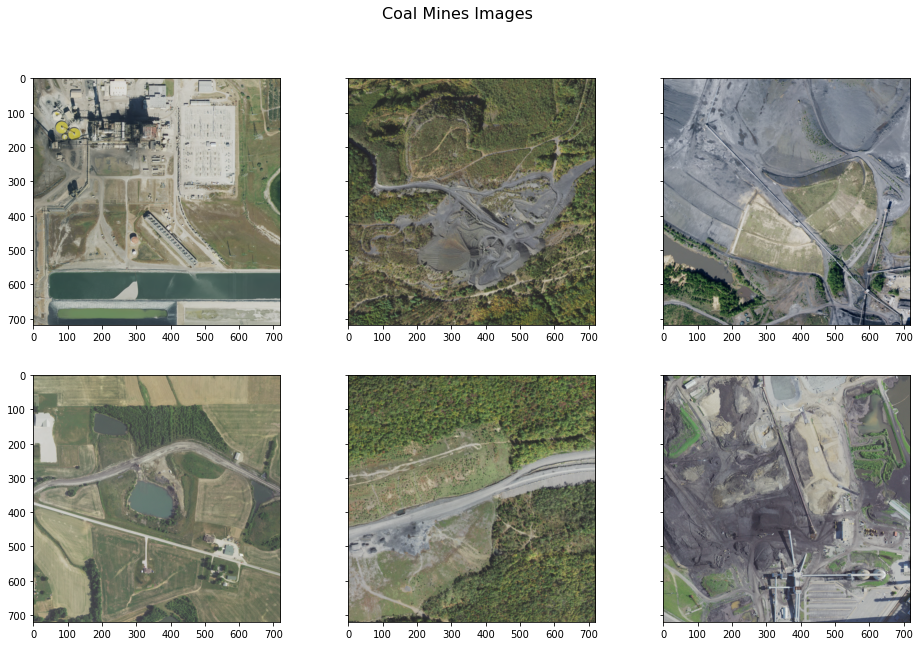

In [24]:
data[categories[6]], figures[categories[6]] = analyze_images(df_subset, categories[6], cat_info[categories[6]])

In [30]:
for cat in categories:
    
    filename = f'subset_{cat}'
    
    # upload dataframe with category metadata
    output_folder.upload_data(f'df_{filename}', data[cat].to_csv(index=False).encode("utf-8"))
    
    # upload figure
    buf = io.BytesIO()
    figures[cat].savefig(buf, format='PNG')
    output_folder.upload_stream(f'fig_{filename}.png', buf.getvalue())